Our code below is based on https://machinelearningmastery.com/gradient-descent-optimization-with-amsgrad-from-scratch/

In [1]:
import math
import numpy as np
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

In [2]:
# Rosenbrock function
def objective(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Derivative of Rosenbrock function
def derivative(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

In [14]:
# Easom function
def objective(x, y):
    return -np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)

# Derivative of Easom function (not required for many optimizers)
def derivative(x, y):
    dx = np.sin(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2) + 2 * (x - np.pi) * np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)
    dy = np.cos(x) * np.sin(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2) + 2 * (y - np.pi) * np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)
    return np.array([dx, dy])

In [9]:
# Himmelblau's function
def objective(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Derivative of Himmelblau's function
def derivative(x, y):
    dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([dx, dy])

In [15]:
# gradient descent algorithm with amsgrad
def amsgrad(objective, derivative, bounds, n_iter, alpha, beta1, beta2):
    solutions = list()
    # generate an initial point
    x = np.array([2.1, 2.1])
    # x = np.array([1.0, 1.0])
    # = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    solutions.append(x.copy())
    # initialize moment vectors
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    vhat = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    for t in range(n_iter):
      # calculate gradient g(t)
      g = derivative(x[0], x[1])
      # update variables one at a time
      for i in range(x.shape[0]):
        # m(t) = beta1(t) * m(t-1) + (1 - beta1(t)) * g(t)
        m[i] = beta1**(t+1) * m[i] + (1.0 - beta1**(t+1)) * g[i]
        # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
        v[i] = (beta2 * v[i]) + (1.0 - beta2) * g[i]**2
        # vhat(t) = max(vhat(t-1), v(t))
        vhat[i] = max(vhat[i], v[i])
        # x(t) = x(t-1) - alpha(t) * m(t) / sqrt(vhat(t)))
        x[i] = x[i] - alpha * m[i] / (math.sqrt(vhat[i]) + 1e-8)
      # evaluate candidate point
      score = objective(x[0], x[1])
      # keep track of all solutions
      solutions.append(x.copy())
      # report progress
      # print('>%d f(%s) = %.5f' % (t, x, score))
    return solutions

def ouradam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, lam1, lam2):
    solutions = []
    # Generate an initial point
    # For Rosenbrock
    # x = np.array([-1.5, -0.0])
    # For Easom
    x = np.array([2.1, 2.1])
    # For Himmelblau
    # x = np.array([1.0, -1.0])
    solutions.append(x.copy())

    # Initialize moment vectors
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    vhat = np.zeros_like(x)
    lam_init1, lam_init2 = lam1, lam2
    p = 0
    # Run the gradient descent
    for t in range(n_iter):
        # Calculate gradient g(t)
        g = derivative(x[0], x[1])
        # print(np.linalg.norm(g, ord=np.inf))
        p += 1
        # if p == 300:
        #   p = 0
        # beta1 = beta1 / np.sqrt(p + 1)
        # beta2 = beta2 / np.sqrt(p + 1)
        # Calculate beta values
        beta_t = [beta1 * np.exp(-lam2 * (np.linalg.norm(g, ord=np.inf))), beta2 * np.exp(-lam2 * (np.linalg.norm(g, ord=np.inf)))]
        #beta_t = [beta1, beta2]

        # Update variables one at a time
        for i in range(x.shape[0]):
            # m(t) = beta1(t) * m(t-1) + (1 - beta1(t)) * g(t)
            m[i] = beta_t[0] **(t+1) * m[i] + (1.0 - beta_t[0]**(t+1)) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = (beta_t[1] * v[i]) + (1.0 - beta_t[1]) * g[i]**2
            # vhat(t) = max(vhat(t-1), v(t))
            vhat[i] = max(vhat[i], v[i])
            # x(t) = x(t-1) - alpha(t) * m(t) / sqrt(vhat(t)))
            x[i] = x[i] - alpha * m[i] / (np.sqrt(vhat[i]) + 1e-8)

        # Evaluate candidate point
        score = objective(x[0], x[1])

        # Keep track of all solutions
        solutions.append(x.copy())

        # Report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))

    return solutions


def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2):
    solutions = []
    # Generate an initial point
    # x = np.array([-1.5, -0.0])
    x = np.array([2.1, 2.1])
    # x = np.array([1.0, -1.0])

    # Initialize moment vectors
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    solutions.append(x.copy())

    # Run the gradient descent
    for t in range(n_iter):
        # Calculate gradient g(t)
        g = derivative(x[0], x[1])

        # Update moment vectors
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        # Bias correction
        m_hat = m / (1 - beta1**(t+1))
        v_hat = v / (1 - beta2**(t+1))

        # Update parameters
        x -= alpha * m_hat / (np.sqrt(v_hat) + 1e-8)

        # Evaluate candidate point
        score = objective(x[0], x[1])

        # Keep track of all solutions
        solutions.append(x.copy())

        # Report progress
        # print('>%d f(%s) = %.5f' % (t, x, score))

    return solutions



2.1 2.1
2.1 2.1


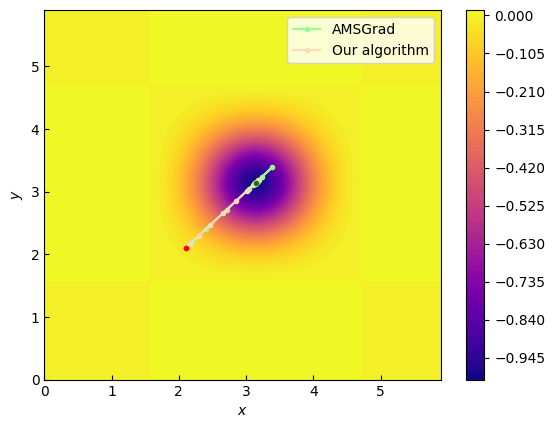

In [21]:
# seed the pseudo random number generator
seed(413)
# define range for input
# For rosenbrock
# bounds = asarray([[-2.0, 2.0], [-1.0, 3.0]])
# For easom
bounds = asarray([[0, 6], [0, 6]])
# For Himmelblau
# bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# define the total iterations
n_iter = 20
# steps size
alpha = 0.1
# factor for average gradient
beta1 = 0.9
# factor for average squared gradient
beta2 = 0.99

lam1 = 0.2
lam2 = 0.2
# perform the gradient descent search with amsgrad
solutions_amsgrad = amsgrad(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
solutions_ouradam = ouradam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, lam1, lam2)
solutions_adam = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
solutions_nadam = nadam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
contour = pyplot.contourf(x, y, results, levels=75, cmap='plasma')
pyplot.colorbar(contour)

# plot the sample as black circles
solutions_amsgrad = asarray(solutions_amsgrad)
pyplot.plot(solutions_amsgrad[:, 0], solutions_amsgrad[:, 1], '.-', color='palegreen', label='AMSGrad')
pyplot.plot(solutions_amsgrad[0, 0], solutions_amsgrad[0, 1], '.-', color='red')
print(solutions_amsgrad[0, 0], solutions_amsgrad[0, 1])

# Plot Adam results
# solutions_adam = asarray(solutions_adam)
# pyplot.plot(solutions_adam[:, 0], solutions_adam[:, 1], '.-', color='skyblue', label='Adam')
# pyplot.plot(solutions_adam[0, 0], solutions_adam[0, 1], '.-', color='red')
# print(solutions_adam[0, 0], solutions_adam[0, 1])

# solutions_nadam = asarray(solutions_nadam)
# pyplot.plot(solutions_nadam[:, 0], solutions_nadam[:, 1], '.-', color='skyblue')
# pyplot.plot(solutions_nadam[0, 0], solutions_nadam[0, 1], '.-', color='red')

# Plot Our algorithm results
solutions_ouradam = asarray(solutions_ouradam)
pyplot.plot(solutions_ouradam[:, 0], solutions_ouradam[:, 1], '.-', color='peachpuff', label='Our algorithm')
pyplot.plot(solutions_ouradam[0, 0], solutions_ouradam[0, 1], '.-', color='red')
print(solutions_ouradam[0, 0], solutions_ouradam[0, 1])

# True minimum of Rosenbrock
# pyplot.plot(1, 1, '.-', color='g')
# True minimum of Himmelblau
# pyplot.plot(3, 2, '.-', color='g')
# True minimum of Easom
pyplot.plot(np.pi, np.pi, '.-', color='g')
pyplot.legend()
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.colorbar
pyplot.tick_params(axis='both', direction='in')
# Set the DPI of the figure to 200
pyplot.savefig('contour_plot_easom2.png', dpi=200)
# pyplot.title('Convergence path on Rosenbrock\'s function')

# show the plot
pyplot.show()